In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import plot_F1_heatmap,get_opt_params, F1_per_bic
%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "QUBIC"
tool_suffix = "QUBIC"
n_runs = 1

parameters = (("r",[1,2,3,4,5,7,10]),
              ("q",[0.05,0.06,0.1,0.25,0.5,0.75]),
              ("c",[0.95,0.75,0.6,0.65,0.5,0.8,0.85,0.9]),
              ("P",["T","F"]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/F1/img"
tsv_outdir = out_dir + "/F1/"

In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 672
	files not found: 3456
	files empty: 0
	failed to parse: 0
Total runs 13440
Non-zero runs: 9353


In [6]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

Total combinations: 672
Total combinations: 672
Combinations with mean F1 > 0.1 132


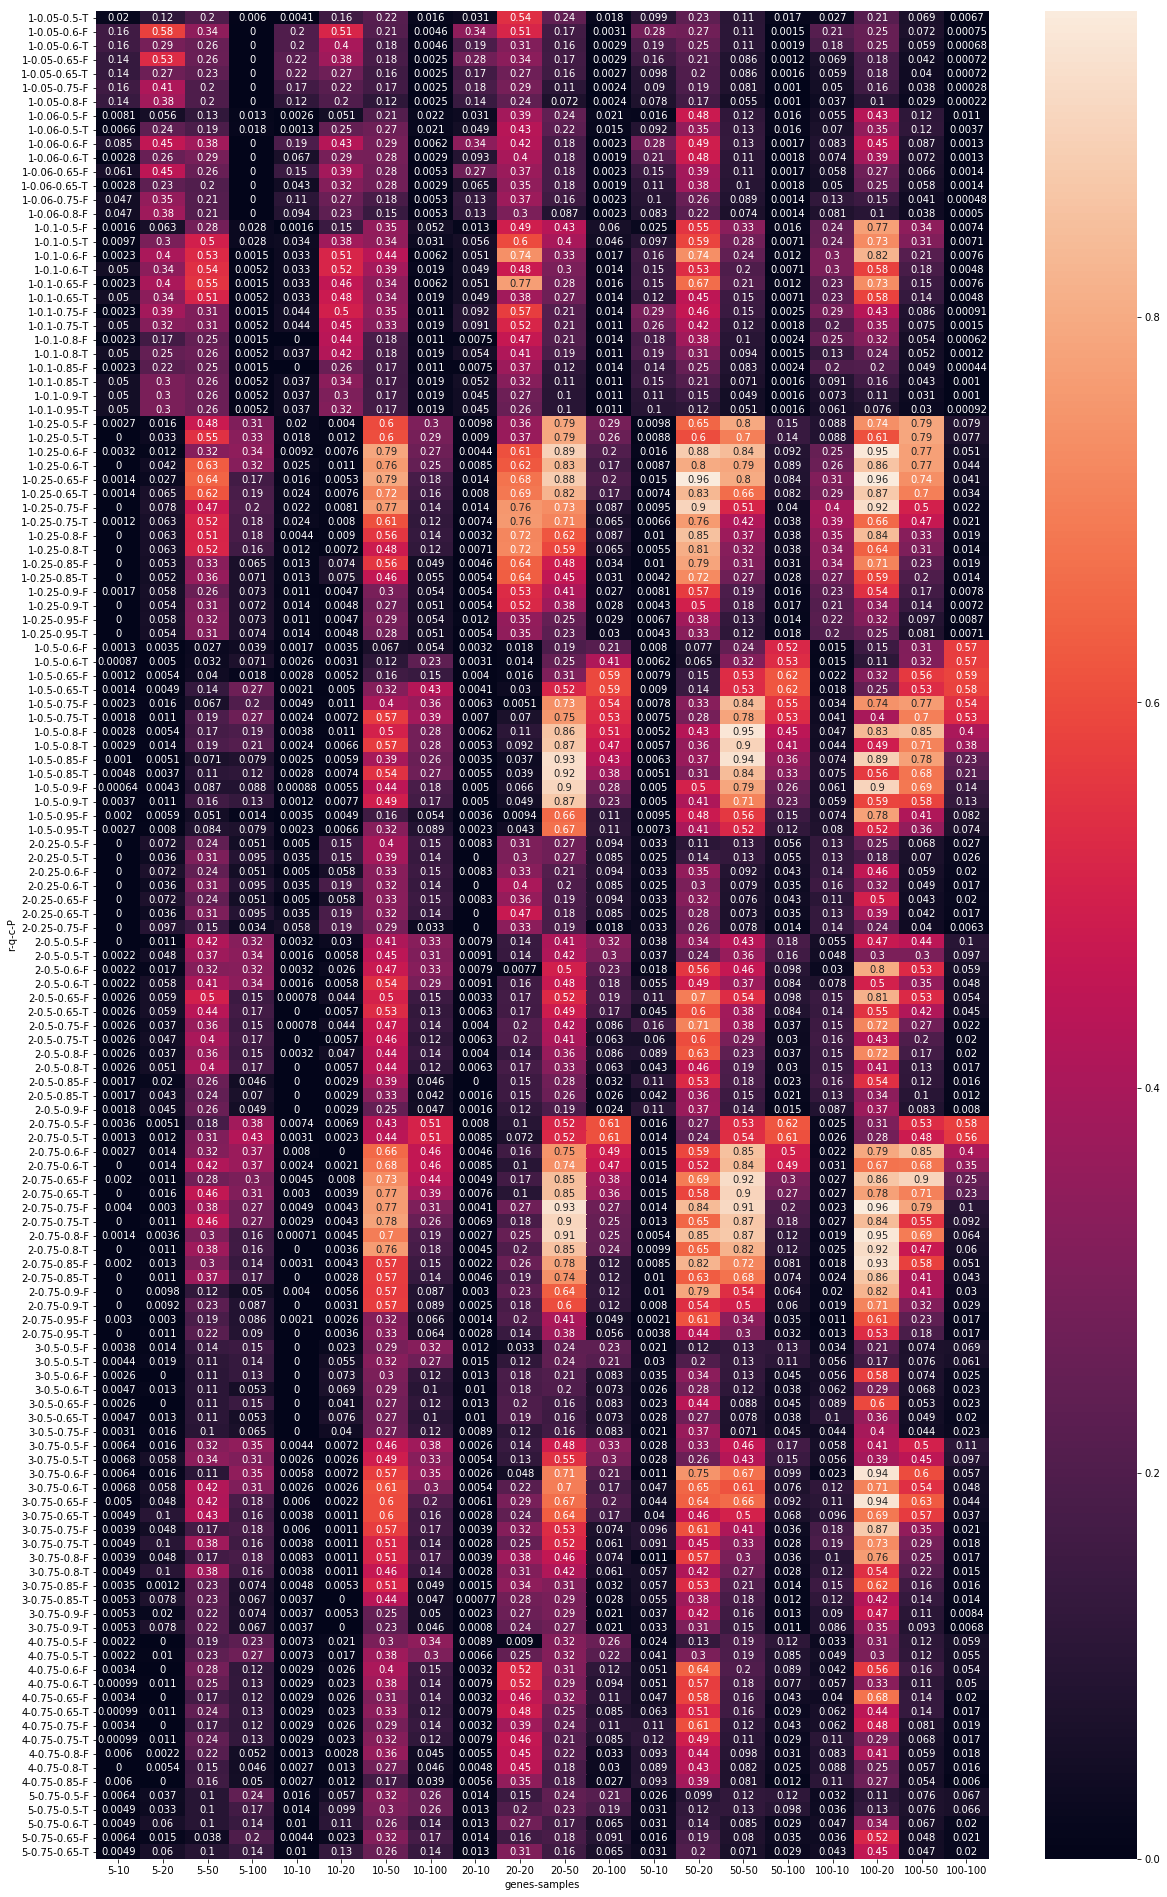

In [11]:
params = ["r","q","c","P"]
plot_file = img_outdir+"/" + tool_name+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_name+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.1,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [12]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

In [13]:
default_params = (1,0.06,0.95,"F")

In [14]:

r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 13440 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	r=1;
	q=0.25;
	c=0.65;
	P=F;
	Max. avg. F1 per bicluster:0.375±0.376
	avg. F1 per best match:0.32±0.333
	biclusters per run:10.0±0.0
With default parameters:
	r=1;
	q=0.06;
	c=0.95;
	P=F;
	avg. F1 per bicluster:0.089±0.098
	avg. F1 per best match:0.055±0.061
	biclusters per run:10.0±0.0


F1 per bicluster                                      \
                           mean       std count       max       min   
r  q    c    P                                                        
1  0.25 0.65 F         0.375418  0.375810    20  0.958995  0.001423   
        0.60 F         0.366132  0.363057    20  0.950574  0.003200   
             T         0.365152  0.345299    20  0.861507  0.000000   
2  0.75 0.60 F         0.362501  0.317252    20  0.853671  0.000000   
        0.65 F         0.356994  0.345946    20  0.919435  0.002007   
        0.75 F         0.352223  0.366670    20  0.957040  0.002969   
1  0.25 0.65 T         0.347668  0.340176    20  0.872913  0.001423   
2  0.75 0.60 T         0.343029  0.295737    20  0.835979  0.000000   
        0.65 T         0.338988  0.323848    20  0.900968  0.000000   
1  0.50 0.80 F         0.330999  0.330877    20  0.947468  0.002792   
   0.25 0.75 F         0.328447  0.337293    20  0.921681  0.000000   
        0.50 F         0.323707  0.305181    20  0.795217  0.002710   
2  0.75 0.75 T         0.317577  0.331014    20  0.904015  0.000000   
        0.80 F         0.317128  0.359497    20  0.951200  0.000709   
1  0.25 0.50 T         0.313732  0.290028    20  0.793149  0.000000   
   0.50 0.75 F         0.308825  0.310265    20  0.841760  0.002348   
             T         0.303838  0.280960    20  0.783686  0.001806   
        0.80 T         0.300561  0.294766    20  0.897779  0.002357   
2  0.75 0.80 T         0.293764  0.330178    20  0.919316  0.000000   
1  0.50 0.85 F         0.293048  0.337303    20  0.935677  0.001020   
   0.25 0.75 T         0.291089  0.293491    20  0.761908  0.001220   
3  0.75 0.65 F         0.289109  0.295778    20  0.943838  0.002235   
1  0.25 0.80 F         0.285440  0.300677    20  0.851667  0.000000   
2  0.75 0.50 T         0.283145  0.242797    20  0.608754  0.001299   
             F         0.281559  0.243929    20  0.618840  0.003616   
3  0.75 0.60 T         0.280304  0.266355    20  0.711673  0.002581   
2  0.75 0.85 F         0.277742  0.325490    20  0.933699  0.002030   
1  0.10 0.60 F         0.277578  0.276517    20  0.822943  0.001493   
3  0.75 0.60 F         0.276842  0.314039    20  0.942537  0.002628   
1  0.50 0.85 T         0.271347  0.296023    20  0.923027  0.002849   
...                         ...       ...   ...       ...       ...   
10 0.06 0.50 F         0.000000  0.000000    20  0.000000  0.000000   
        0.90 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.85 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.80 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.75 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.65 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.60 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.50 T         0.000000  0.000000    20  0.000000  0.000000   
   0.05 0.95 T         0.000000  0.000000    20  0.000000  0.000000   
7  0.05 0.65 F         0.000000  0.000000    20  0.000000  0.000000   
10 0.05 0.95 F         0.000000  0.000000    20  0.000000  0.000000   
        0.90 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.85 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.80 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.0000